<a href="https://colab.research.google.com/github/michaelbram10/Case-Study-04-Data-Mining-Korelasi-dan-Regresi-Ganjil-2022-Kelompok-C/blob/main/Case_Study_4_Group_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study Case 04 - Data Mining dan Business Intelligence : Korelasi dan Regresi pada Data Ashrae Energy Prediction 

**Group C:**
1. Benedicta Winni Lisachritanty (1906299446)
2. Fadhilah Daffa Yoriko (2006571116)
3. Hafsa Khaerunisa Wenno (1906354173)
4. Michael Mario Bramanthyo Adhi (1906299534)
5. Nathanael Andrian Patrick (1906375713)
6. Naufal Fachri Muhammad (2006533710)
7. Reynee Joyvina Freeina Anthonia (2006485024)

# *Problem Statement*

## [Ashrae Energy](https://www.ashrae.org/)

- Menaksir nilai peningkatan efisiensi energi dapat menjadi tantangan karena tidak ada cara untuk benar-benar mengetahui berapa banyak energi yang akan digunakan bangunan tanpa peningkatan. Yang terbaik yang bisa kita lakukan adalah membangun model kontrafaktual. Setelah bangunan dirombak, konsumsi energi baru (lebih rendah) dibandingkan dengan nilai model bangunan asli untuk menghitung penghematan dari retrofit. Model yang lebih akurat dapat mendukung insentif pasar yang lebih baik dan memungkinkan pembiayaan dengan biaya lebih rendah.
- Tantangannya adalah membangun model kontrafaktual ini di empat jenis energi berdasarkan tingkat penggunaan historis dan cuaca yang diamati. Kumpulan data mencakup pembacaan meter per jam selama tiga tahun dari lebih dari seribu bangunan di beberapa lokasi berbeda di seluruh dunia.

Informasi tambahan:
- Data adalah "modifikasi" (Perselisihan) dari data asli yang bersumber dari PT Ashrae : https://www.kaggle.com/competitions/ashrae-energy-prediction/data
- Permasalahan dan pemahaman data sama dengan asal data. Perbedaan data yang akan digunakan pada studi kasus kita adalah data yang akan digunakan adalah “rata-rata” penggunaan energi listrik dari berbagai gedung (tidak lagi time-series / bergantung waktu).

## *Main Focus*

1. Apa saja faktor yang secara signifikan dapat menjelaskan nilai meter reading (penggunaan energi) pada suatu bangunan?
2. Bagaimana cara meningkatkan efisiensi dalam penggunaan energi untuk suatu bangunan? <br>

Note: Energi dalam hal ini diasumsikan keseluruhan energi yang digunakan dalam suatu bangunan, baik energi listrik, air dingin, uap, maupun air panas.

# *Data Pre-Processing*

In [ ]:
#Data Manipulatiom
import pandas as pd
import numpy as np
import sklearn
import scipy
from scipy.stats import iqr

#Visualization
import seaborn as sns           
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
import matplotlib.cm as cm 
from collections import Counter 
plt.style.use('bmh'); sns.set() 

#Modelling
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics import normalized_mutual_info_score as NMI 
from sklearn.metrics import silhouette_score, davies_bouldin_score
sns.set(style="ticks", color_codes=True) 
random_state = 99  #ini buat untuk random_state dan ini penting banget buat kmeans

from scipy.spatial.distance import euclidean
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform 
from math import isnan
import pytest
import setuptools

from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
np.random.seed(1234)
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedStratifiedKFold

### *Import Data*

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv')

In [ ]:
# Data Size
N, P = df.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)

# Variable Type
print("Tipe Variabel df = ", type(df))

# Show The First Five Data
df.head()

baris =  1413 , Kolom (jumlah variabel) =  12
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
# Show The Last Five Data
df.tail()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1412,3.338595,Office,92271,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


## *Data Understanding*

Keterangan:
- meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.
- primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
- square_feet - Gross floor area of the building
- year_built - Year building was opened
- floor_count - Number of floors of the building
- air_temperature - Degrees Celsius
- cloud_coverage - Portion of the sky covered in clouds, in oktas
- dew_temperature - Degrees Celsius
- precip_depth_1_hr - Millimeters
- sea_level_pressure - Millibar/hectopascals
- wind_direction - Compass direction (0-360)
- wind_speed - Meters per second


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [ ]:
list(df.columns)

['meter_reading',
 'primary_use',
 'square_feet',
 'year_built',
 'floor_count',
 'air_temperature',
 'cloud_coverage',
 'dew_temperature',
 'precip_depth_1_hr',
 'sea_level_pressure',
 'wind_direction',
 'wind_speed']

In [ ]:
df.dtypes

meter_reading         float64
primary_use            object
square_feet             int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

### *Drop Column (Handling Missing Values)*

In [ ]:
(df.isnull().sum()/len(df))*100 

meter_reading          0.000000
primary_use            0.000000
square_feet            0.000000
year_built            53.078556
floor_count           75.088464
air_temperature        0.000000
cloud_coverage         1.203114
dew_temperature        0.000000
precip_depth_1_hr     12.455768
sea_level_pressure     6.298655
wind_direction         0.000000
wind_speed             0.000000
dtype: float64

Note: Terdapat lebih dari 50% missing values pada kolom `year_bulit` dan `floor_count`. Beberapa hal yang mungkin menjadi penyebab missing values tersebut adalah tidak terjadi pencatatan kapan bangunan tersebut dibangun (bisa jadi bangunan tersebut ilegal sehingga tidak ada dokumen resmi/bukti fisik yang menyatakan tahun pembangunan dan jumlah lantai dalam suatu bangunan). Dengan demikian, kedua kolom tersebut akan didrop dari data.

In [ ]:
df.drop(columns = ['year_built', 'floor_count'], inplace=True)

In [ ]:
# Type Data Correction
df['primary_use'] = df['primary_use'].astype('category')

### Pengelompokan Kolom Berdasarkan Tipe Data

In [ ]:
# melihat kolom dengan tipe data yang berbeda (number dan object)

df_number = []
df_int = []
df_float = []
df_object = []
df_cat = []

df_number.append(df.select_dtypes('number').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_int.append(df.select_dtypes('integer').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_float.append(df.select_dtypes('float').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_object.append(df.select_dtypes('object').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe object
df_cat.append(df.select_dtypes('category').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe category

print('Kolom bertipe Number (Integer/Float):\n\n',df_number,'\n')
print('Kolom bertipe Integer               :\n',df_int,'\n')
print('Kolom bertipe Float                 :\n',df_float,'\n')
print('Kolom bertipe Object                :\n',df_object,'\n')
print('Kolom bertipe Category              :\n\n',df_cat)

Kolom bertipe Number (Integer/Float):

 [['meter_reading', 'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed']] 

Kolom bertipe Integer               :
 [['square_feet']] 

Kolom bertipe Float                 :
 [['meter_reading', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed']] 

Kolom bertipe Object                :
 [[]] 

Kolom bertipe Category              :

 [['primary_use']]


### *Handling Duplicate Data*

In [ ]:
sum(df.duplicated())

0

In [ ]:
#Remove Duplicate
df.drop_duplicates(inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(1413, 10)


Note: Tidak terdapat data duplikat di dalam data Ashrae Energy Prediction

### Memilih data category

In [ ]:
#Feature yang data typenya category
df_cat = df.select_dtypes(include='category').columns
print(df_cat)

Index(['primary_use'], dtype='object')


In [ ]:
obj = list(df_cat)
df[obj].nunique()

primary_use    16
dtype: int64

### Memilih data numerik

In [ ]:
#Feature yang data typenya numerik
df_num = df.select_dtypes(include = ['float64', 'int64']).columns
print(df_num)

Index(['meter_reading', 'square_feet', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')


## *Detecting and Handling Missing Values*

In [ ]:
# Informasi Jumlah dan Persentase Missing Value

## general

df_mv = df.isnull().sum()                      # menampilkan jumlah total missing value per kolom
df_pmv = (df.isnull().sum()/len(df))*100     # menampilkan persentase missing value per kolom

df_missing = pd.concat([df_mv,df_pmv],axis = 1).reset_index() # menampilkan data dalam bentuk data frame

df_missing.columns = ['Kolom','Jumlah Missing Value','Persentase Missing Value']
missing_value = df_missing

print('Data Missing Value:\n')
print(missing_value.sample(5),'\n')
print('Persentase Missing Value Terbesar                  : ',missing_value['Persentase Missing Value'].max())
print('Persentase Missing Value Keseluruhan               : ',missing_value['Persentase Missing Value'].sum(),'\n') 

print('Data Duplikat:\n')
print('Jumlah terdapat data duplikat pada data df         : ',df.duplicated().sum(), '(',(df.duplicated().sum()/len(df))*100,'%',')')

Data Missing Value:

                Kolom  Jumlah Missing Value  Persentase Missing Value
7  sea_level_pressure                    89                  6.298655
2         square_feet                     0                  0.000000
9          wind_speed                     0                  0.000000
1         primary_use                     0                  0.000000
0       meter_reading                     0                  0.000000 

Persentase Missing Value Terbesar                  :  12.455767869780608
Persentase Missing Value Keseluruhan               :  19.95753715498938 

Data Duplikat:

Jumlah terdapat data duplikat pada data df         :  0 ( 0.0 % )


In [ ]:
print('Jumlah Data Missing Value:\n')
print(df.isnull().sum())

Jumlah Data Missing Value:

meter_reading           0
primary_use             0
square_feet             0
air_temperature         0
cloud_coverage         17
dew_temperature         0
precip_depth_1_hr     176
sea_level_pressure     89
wind_direction          0
wind_speed              0
dtype: int64


In [ ]:
# Proportion Missing Values for every colomn
df.isnull().sum()/df.shape[0]
#(df.isnull().sum()/len(df)).to_frame('persentase missing') 

meter_reading         0.000000
primary_use           0.000000
square_feet           0.000000
air_temperature       0.000000
cloud_coverage        0.012031
dew_temperature       0.000000
precip_depth_1_hr     0.124558
sea_level_pressure    0.062987
wind_direction        0.000000
wind_speed            0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

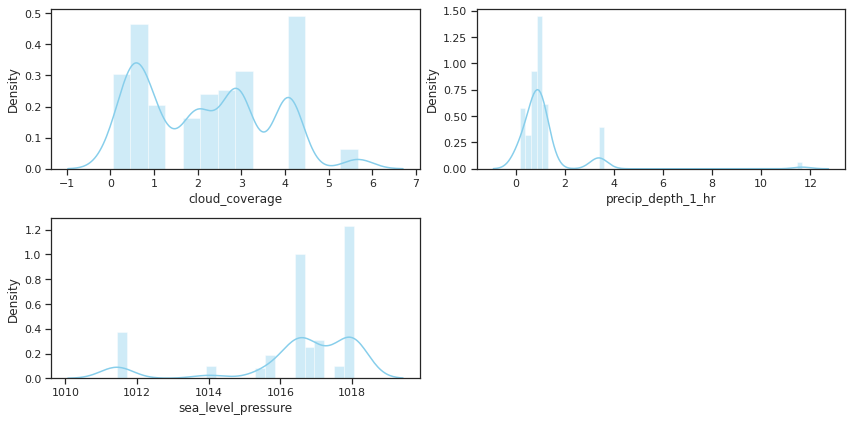

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = ['cloud_coverage','precip_depth_1_hr','sea_level_pressure']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Note: Pada kolom `cloud_coverage` dan `sea_level_pressure` memiliki missing values yang kurang dari 10% dan untuk kolom `precip_depth_1_hr` memiliki missing values sekitar 12%. Dalam hal ini, akan dilakukan imputasi karena jumlah missing values tersebut masih relatif kecil. Kemudian jika dilihat berdasarkan distribusi dari ketiga kolom tersebut, dilihat bahwa ketiganya memiliki distribusi yang cenderung skewed sehingga imputasi akan menggunakan nilai median dari masing-masing kolom.

In [ ]:
# Handling missing values using imputation
df['cloud_coverage'] = df['cloud_coverage'].fillna(np.median(df['cloud_coverage'].dropna()))
df['precip_depth_1_hr'] = df['precip_depth_1_hr'].fillna(np.median(df['precip_depth_1_hr'].dropna()))
df['sea_level_pressure'] = df['sea_level_pressure'].fillna(np.median(df['sea_level_pressure'].dropna()))

In [ ]:
# Proportion Missing Values for every colomn After Imputation
df.isnull().sum()/df.shape[0]
#(df.isnull().sum()/len(df)).to_frame('persentase missing') 

meter_reading         0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

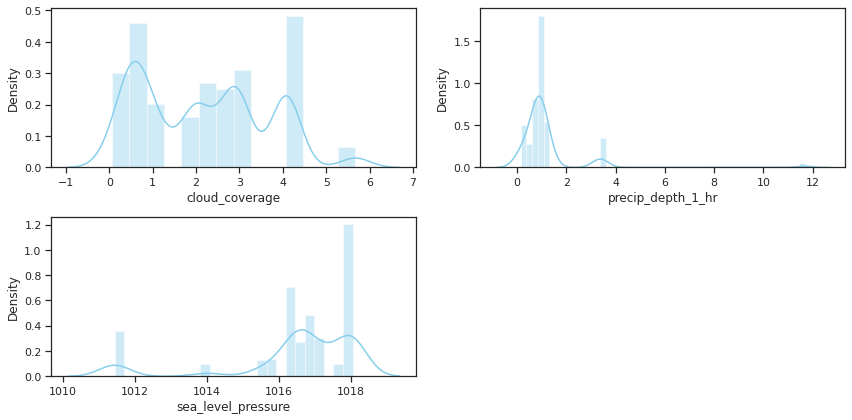

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = ['cloud_coverage','precip_depth_1_hr','sea_level_pressure']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Note: Setelah dilakukan imputasi dapat dilihat bahwa distribusi dari ketiga kolom tersebut masing cenderung mirip dengan hasil sebelum dilakukan imputasi sehingga dalam hal ini handling dengan imputasi (nilai median) dapat dilakukan.

(array([292., 252.,   0., 243., 141., 175.,   0., 274.,   0.,  36.]),
 array([0.05926623, 0.62051812, 1.18177002, 1.74302191, 2.30427381,
        2.8655257 , 3.4267776 , 3.98802949, 4.54928139, 5.11053328,
        5.67178518]),
 <a list of 10 Patch objects>)

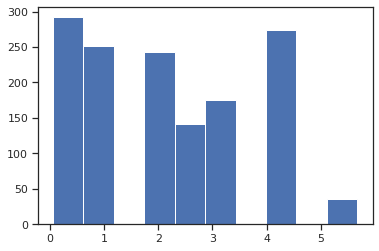

In [ ]:
plt.hist(df['cloud_coverage'])

(array([1282.,    0.,  114.,    0.,    0.,    0.,    0.,    0.,    0.,
          17.]),
 array([ 0.15532499,  1.30735578,  2.45938658,  3.61141737,  4.76344816,
         5.91547895,  7.06750974,  8.21954054,  9.37157133, 10.52360212,
        11.67563291]),
 <a list of 10 Patch objects>)

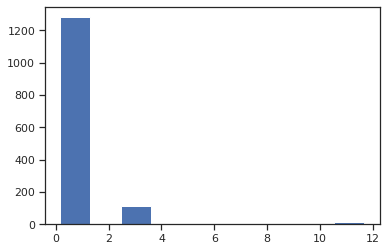

In [ ]:
plt.hist(df['precip_depth_1_hr'])

(array([135.,   0.,   0.,  36.,   0.,   0.,  98., 365., 294., 485.]),
 array([1011.43656295, 1012.09811296, 1012.75966297, 1013.42121298,
        1014.08276299, 1014.74431299, 1015.405863  , 1016.06741301,
        1016.72896302, 1017.39051303, 1018.05206304]),
 <a list of 10 Patch objects>)

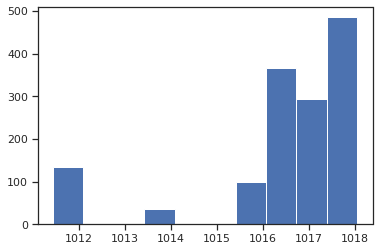

In [ ]:
plt.hist(df['sea_level_pressure'])

# *Exploratory Data Analysis (EDA)*

## *Detecting Outliers*

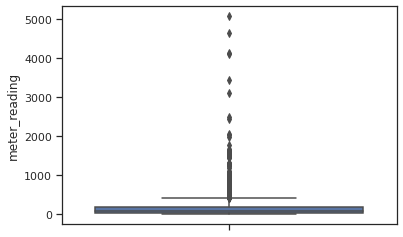

In [ ]:
sns.boxplot(y=df['meter_reading'])

Note: Terdapat deteksi outliers pada variabel target (`meter_reading`)

In [ ]:
def remove_outlier_univariate(series):
    """Fungsi ini akan mengeluarkan series yang telah dikeluarkan outliernya dan data outliernya"""
    lower = series.quantile(0.25) - 1.5*iqr(series)
    upper = series.quantile(0.75) + 1.5*iqr(series)
    new_series = series[(series >= lower) & (series <= upper)]
    outliers_data = series[(series < lower) | (series > upper)]
    return new_series, outliers_data

y_new, outliers = remove_outlier_univariate(df['meter_reading'])
df_no_outlier = df.iloc[y_new.index, :]

(array([482., 271., 154., 118.,  78.,  49.,  29.,  28.,  21.,  25.]),
 array([3.99977231e-04, 4.15068140e+01, 8.30132279e+01, 1.24519642e+02,
        1.66026056e+02, 2.07532470e+02, 2.49038884e+02, 2.90545298e+02,
        3.32051712e+02, 3.73558126e+02, 4.15064540e+02]),
 <a list of 10 Patch objects>)

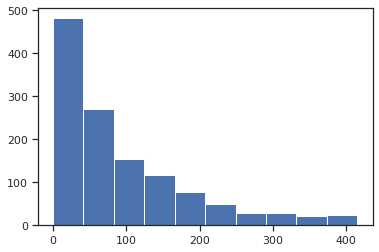

In [ ]:
plt.hist(df_no_outlier["meter_reading"])

In [ ]:
df_outlier = df.iloc[outliers.index, :]
df_outlier

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
4,1579.174237,Education,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
7,569.244417,Education,121074,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
8,417.394827,Education,60809,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
10,1593.610509,Entertainment/public assembly,370773,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
11,475.006736,Education,49073,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...
1346,788.540784,Education,214505,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1348,420.242191,Education,204029,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1350,429.322064,Public services,243072,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1394,433.123925,Office,53303,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [ ]:
df_outlier.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
meter_reading,158.0,NaN,NaN,NaN,915.153184,768.722197,417.015487,488.820843,639.127718,991.011097,5072.323426
primary_use,158,9,Education,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_feet,158.0,NaN,NaN,NaN,249668.873418,181573.739997,7867.0,128316.25,200687.5,324498.0,875000.0
air_temperature,158.0,NaN,NaN,NaN,16.082209,5.82919,7.572136,9.115628,15.353381,22.744816,24.963702
cloud_coverage,158.0,NaN,NaN,NaN,2.152475,1.172857,0.059266,0.681089,2.083712,2.998727,4.079235
dew_temperature,158.0,NaN,NaN,NaN,9.071429,5.52477,2.037952,3.901814,8.285693,13.848085,17.379328
precip_depth_1_hr,158.0,NaN,NaN,NaN,1.759565,2.79071,0.155325,0.808871,0.89598,1.240589,11.675633
sea_level_pressure,158.0,NaN,NaN,NaN,1016.672273,1.578701,1011.436563,1016.404579,1016.608501,1017.949437,1018.052063
wind_direction,158.0,NaN,NaN,NaN,171.615219,26.002385,123.388701,152.521015,184.295922,187.301104,206.995037
wind_speed,158.0,NaN,NaN,NaN,3.396087,0.595494,2.157103,3.100911,3.391472,3.905433,4.112377


In [ ]:
df_outlier[df_outlier['meter_reading'] >= 3000]

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
783,4125.027806,Education,731945,7.572136,2.083712,2.037952,11.675633,1015.596794,206.995037,3.390690
786,3106.068858,Education,764237,7.572136,2.083712,2.037952,11.675633,1015.596794,206.995037,3.390690
788,4093.949854,Education,527431,7.572136,2.083712,2.037952,11.675633,1015.596794,206.995037,3.390690
790,4650.168481,Education,484376,7.572136,2.083712,2.037952,11.675633,1015.596794,206.995037,3.390690
792,5072.323426,Education,182986,7.572136,2.083712,2.037952,11.675633,1015.596794,206.995037,3.390690
1071,3430.982972,Education,287594,9.115628,2.778787,2.836979,0.808871,1016.426988,187.301104,4.112377


Note: Terdapat 158 observasi yang terdeteksi outliers yang mana data ini didominasi oleh bangunan untuk kegunaan pendidikan. Jika dikaji lebih dalam, meter reading tertinggi adalah bangunan dengan primary use pendidikan yaitu membutuhkan energi sebesar 5.072 kwh. Namun sebenarnya jika dilihat dari luas bangunannya, bangunan tersebut cenderung tidak seluas dari bangunan lainnya yang memiliki konsumsi energi lebih rendah. Maka dari itu, diperlukan maintanance lebih pada bangunan tersebut. Hal tersebut merupakan salah satu contoh bangunan yang terdeteksi outliers yang mana diasumsikan terdapat hal yang janggal pada bangunan tersebut. Dengan demikian, untuk data yang terdeteksi outliers tersebut perlu dilakukan beberapa hal seperti:
- Pengecekan apakah ada penggunaan energi yang tidak efisien?
- Pengecekan apakah ada suatu kebocoran (misal air atau lainnya) sehingga mengonsumsi sebagian besar energi yang sebenarnya tidak digunakan?
- Melakukan breakdown konsumsi energi yang digunakan setiap bulan sehingga dapat diketahui energi apa dan untuk apa energi tersebut digunakan.
- Perlu dilakukan sosialisasi tentang bagaimana cara melakukan penghematan konsumsi energi kepada orang yang tinggal atau beraktivitas dalam bangunan tersebut.

In [ ]:
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meter_reading       1255 non-null   float64 
 1   primary_use         1255 non-null   category
 2   square_feet         1255 non-null   int64   
 3   air_temperature     1255 non-null   float64 
 4   cloud_coverage      1255 non-null   float64 
 5   dew_temperature     1255 non-null   float64 
 6   precip_depth_1_hr   1255 non-null   float64 
 7   sea_level_pressure  1255 non-null   float64 
 8   wind_direction      1255 non-null   float64 
 9   wind_speed          1255 non-null   float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 99.9 KB


Note: Untuk kasus selanjutnya akan dilakukan analisis regresi dengan menggunakan data tanpa outliers.

### Hasil data setelah di cleansing

In [ ]:
df_no_outlier.head()

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
5,28.963481,Education,8000,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


## Case 1:
Distribusi bangunan berdasarkan kegunaannya

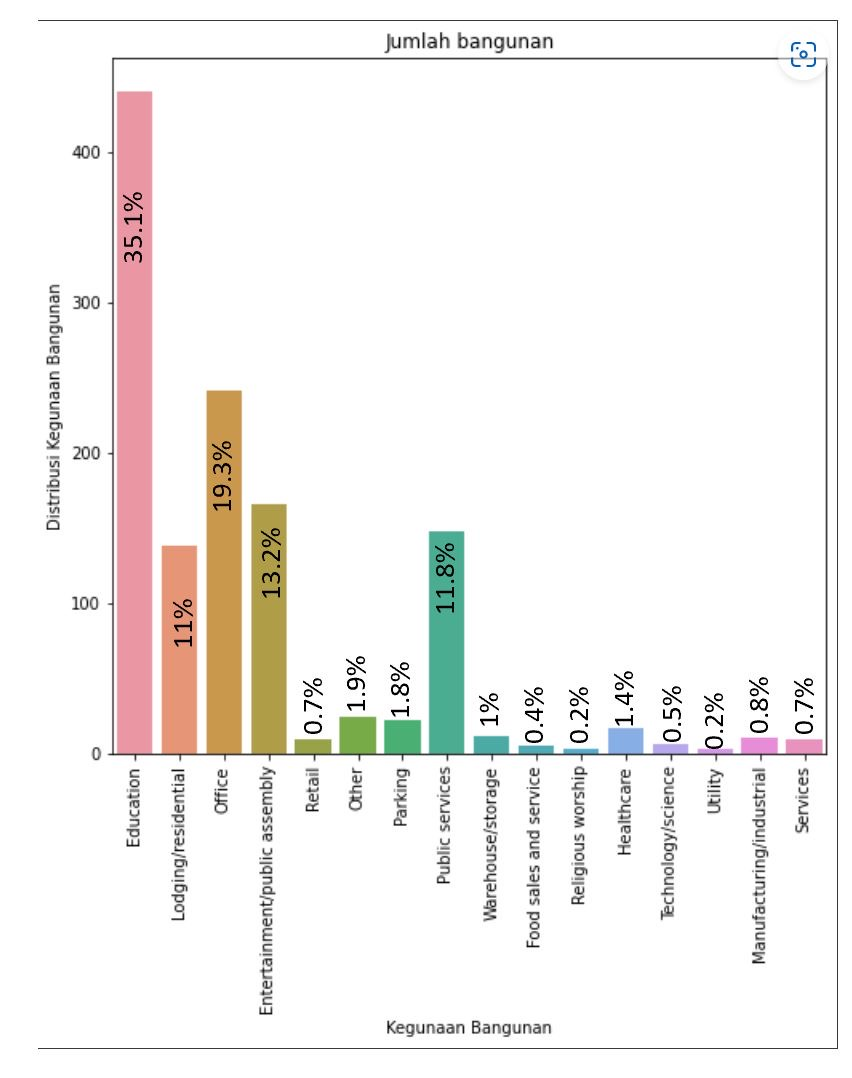

Note:
- Dari distribusi tersebut diperoleh informasi bahwa 5 bangunan terbanyak digunakan untuk pendidikan yaitu sekitar 35.1%, diikuti perkantoran, entertaiment, public service, dan residental yang mana kelima bangunan tersebut merupakan bangunan publik yang masuk ke dalam kebutuhan utama dari masyarakat.
- Sedangkan 5 bangunan terendah digunakan untuk utility yaitu sekitar 0.2%, diikuti keagamaan, food sales and service, technology/science, dan service.

Hal ini dapat dilakukan analisis lebih lanjut terkait jumlah bangunan dari setiap daerah sehingga dapat dilihat bagaimana distribusi jumlah bangunan di setiap daerah (apakah dapat memenuhi kebutuhan masyarakat atau tidak?). Selain itu, dapat diberikan suatu insight kepada pemerintah (atau organisasi yang berwenang dalam mengatur pembangunan di suatu kota) bahwa bangunan keagamaan perlu diperbanyak guna memenuhi kebutuhan masyarakat dalam beribadah.

## Case 2:
Bangunan dengan kategori apa yang konsumsi energinya paling tinggi dan paling rendah?

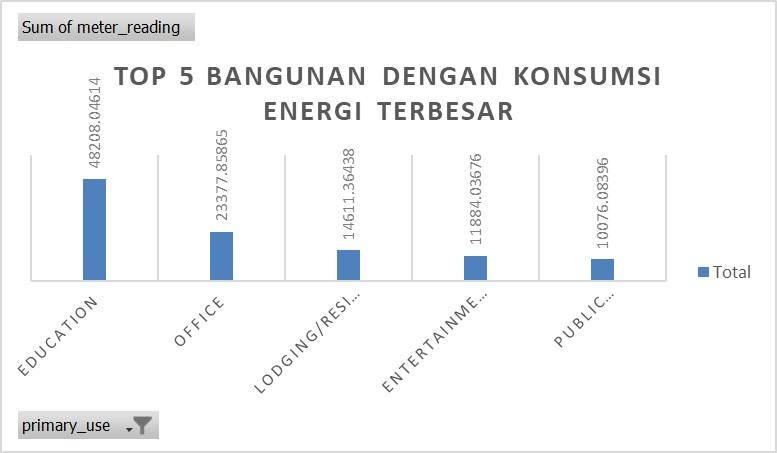

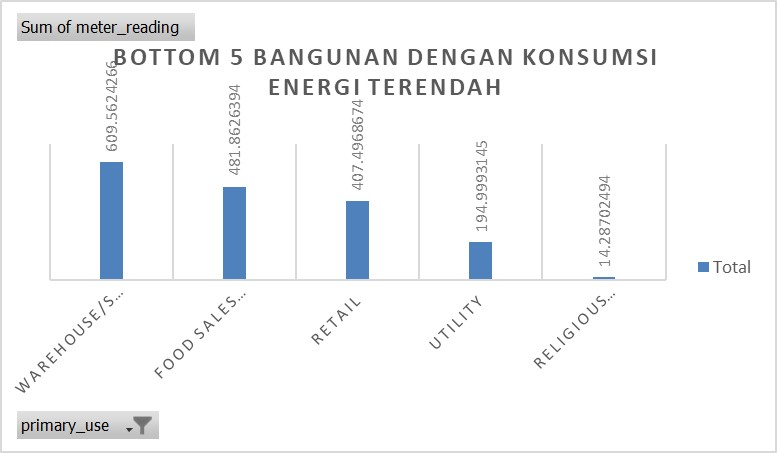

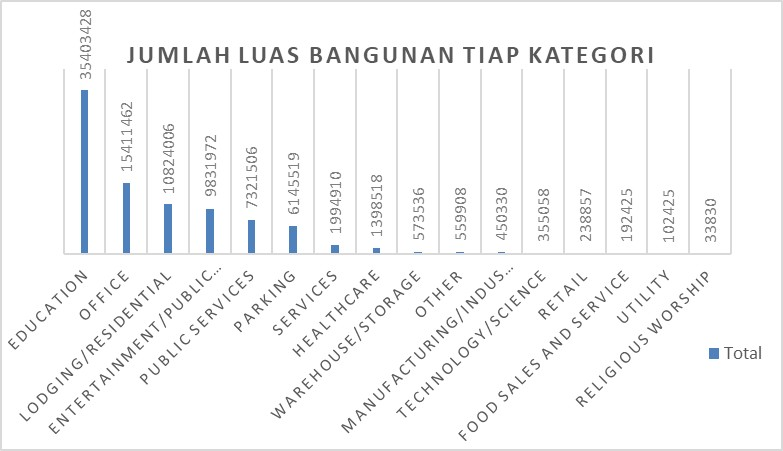

Berdasarkan data pada visualisasi di atas, dapat dilihat bahwa 5 bangunan teratas dengan kategori berikut ini yang mengkonsumsi energi tertinggi, yakni bangunan berkategori Education (sebanyak 48208.04614 kWh), Office (sebanyak 2377.85865 kWh), Lodging/Residential (sebanyak 14611.36438 kWh), Entertainment/public assembly (sebanyak 11884.03676 kWh) , dan Public services (sebanyak 10076.08396 kWh). Hal ini dapat memberikan informasi bahwa bangunan-bangunan publik dan tempat tinggal yang cenderung digunakan setiap hari sehingga memiliki konsumsi energi yang lebih tinggi daripada bangunan lainnya. Hal ini masuk akal karena bangunan publik cenderung dikunjungi oleh banyak orang yang setiap orang cenderung berkontribusi dalam menambah konsumsi energi dari suatu bangunan.

Sedangkan, untuk 5 bangunan terbawah yang mengkonsumsi energi tertinggi, adalah bangunan dengan kategori Religious Worship (sebanyak 14.28702494 kWh), Utility (sebanyak 194.9993145 kWh), Retail (sebanyak 407.4968674 kWh), Food Sales and Service (sebanyak 481.8626394 kWh), Warehouse/Storage (sebanyak 609.5624266 kWh).

Pada data 5 bangunan dengan posisi teratas, terbukti bahwa bangunan dengan kategori tersebut mengkonsumsi energi tertinggi berdasarkan pada visualisasi data square_feet. Seperti pada kategori Education, dapat dilihat square_feet tertinggi. Sehingga, diasumsikan penggunaan energinya juga yang tertinggi.

## Pairwise Analysis

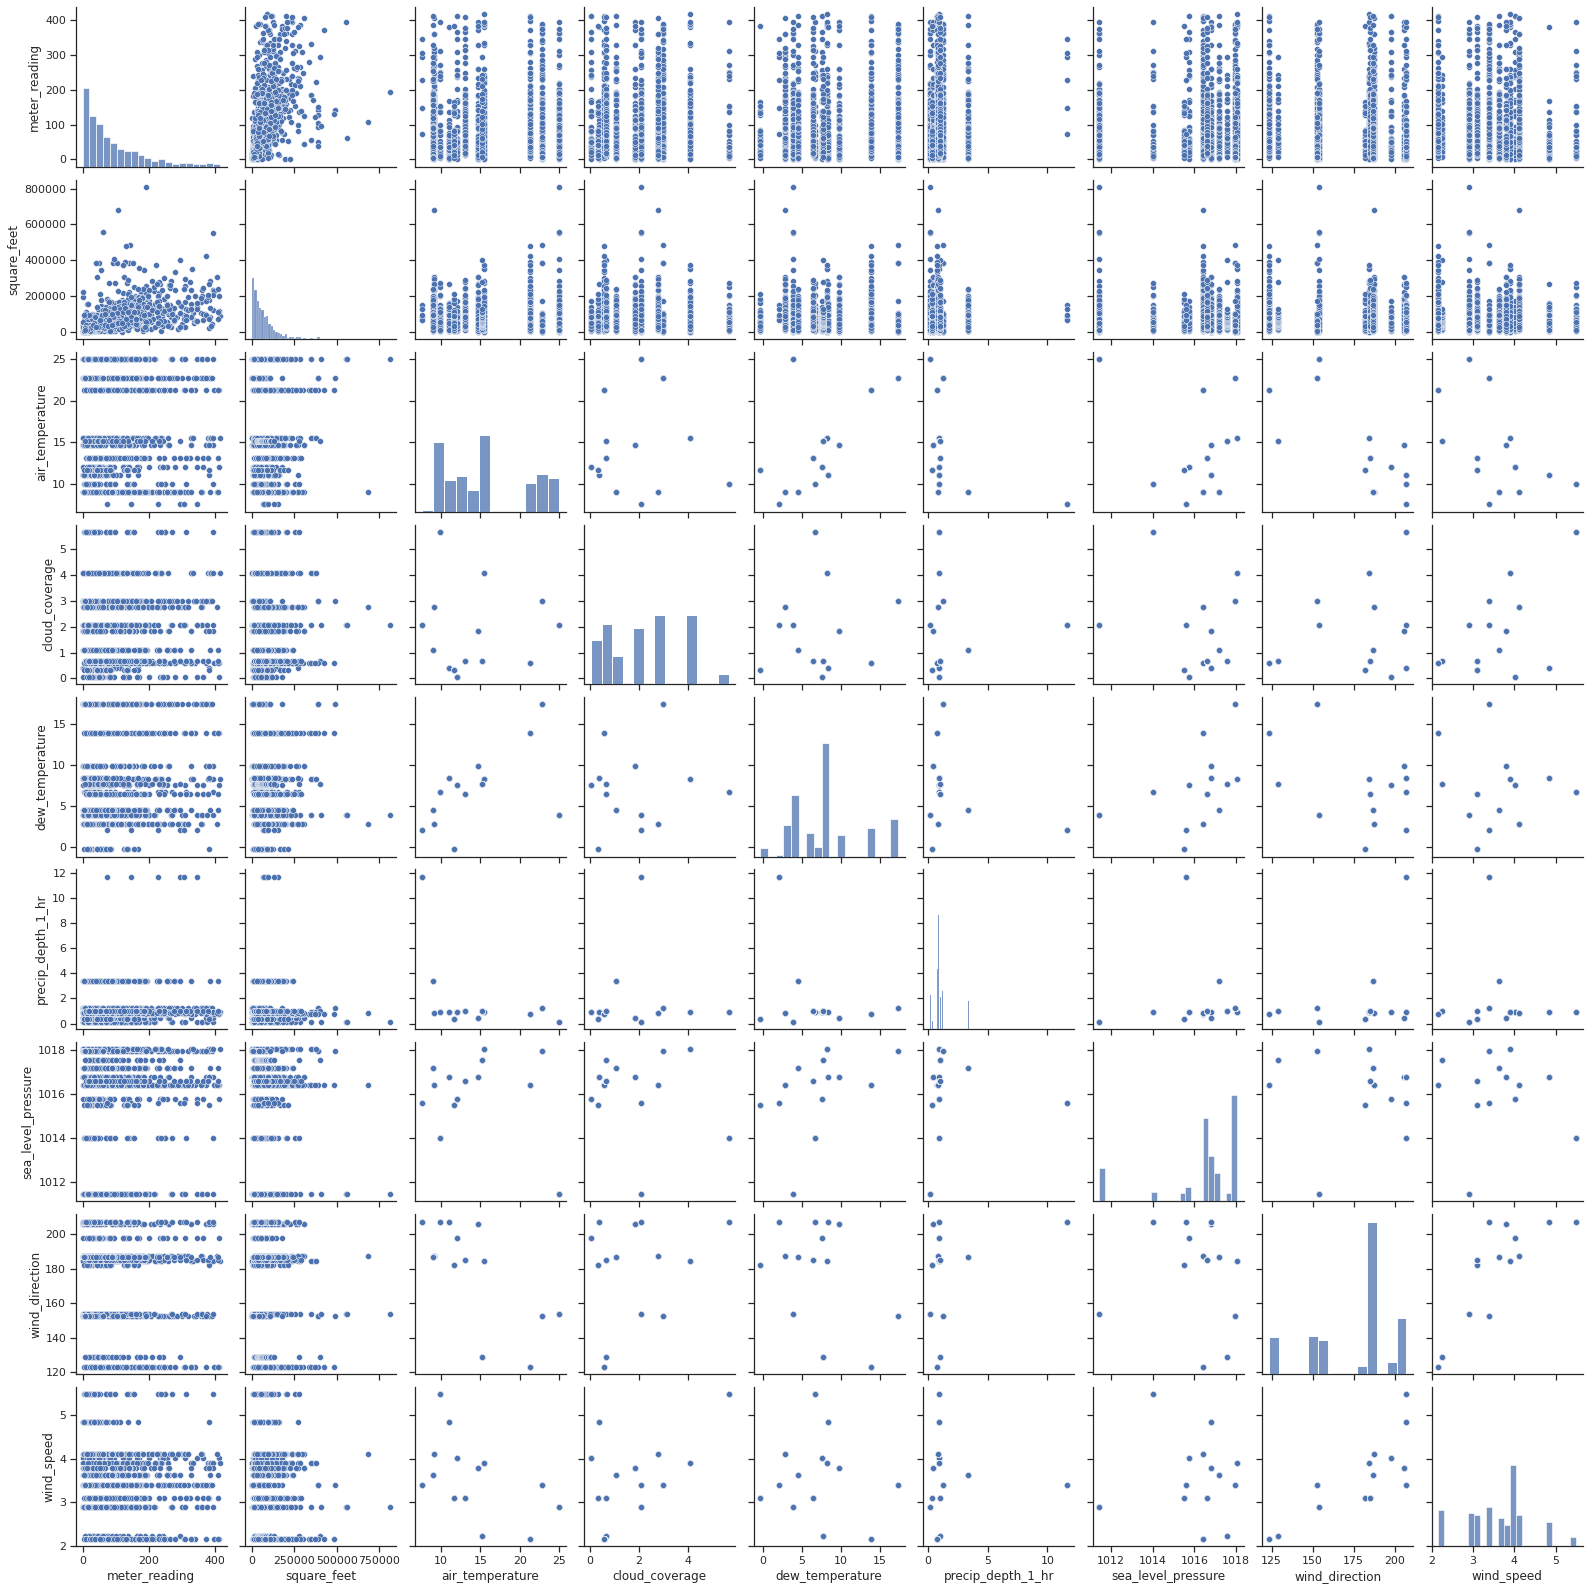

In [ ]:
sns.pairplot(df_no_outlier.select_dtypes(include=np.number))
plt.show()

Note:
- Variabel air_tempeature memiliki hubungan positif yang cukup kuat dengan dew_teperature, sehingga terindikasikan bahwa kedua variabel memiliki korelasi positif yang cukup kuat. Atau dengan kata lain untuk bangunan yang memiliki suhu udara yang tinggi cenderung memiliki suhu air yang tinggi juga.
- Variabel wind_speed memiliki hubungan positif yang cukup kuat dengan cloud_coverage, sehingga terindikasikan bahwa kedua variabel memiliki korelasi positif yang cukup kuat. Atau dengan kata lain untuk bangunan yang memiliki kecepatan angin yang tinggi cenderung memiliki cloud_coverage yang tinggi juga.
- Variabel dew_temperature memiliki hubungan negatif yang lemah dengan cloud_coverage, sehingga terindikasi bahwa kedua variabel memiliki korelasi negatif yang lemah. Atau dengan kata lain untuk bangunan yang memiliki suhu air yang tinggi cenderung memiliki cloud_coverage yang rendah.

## Correlation

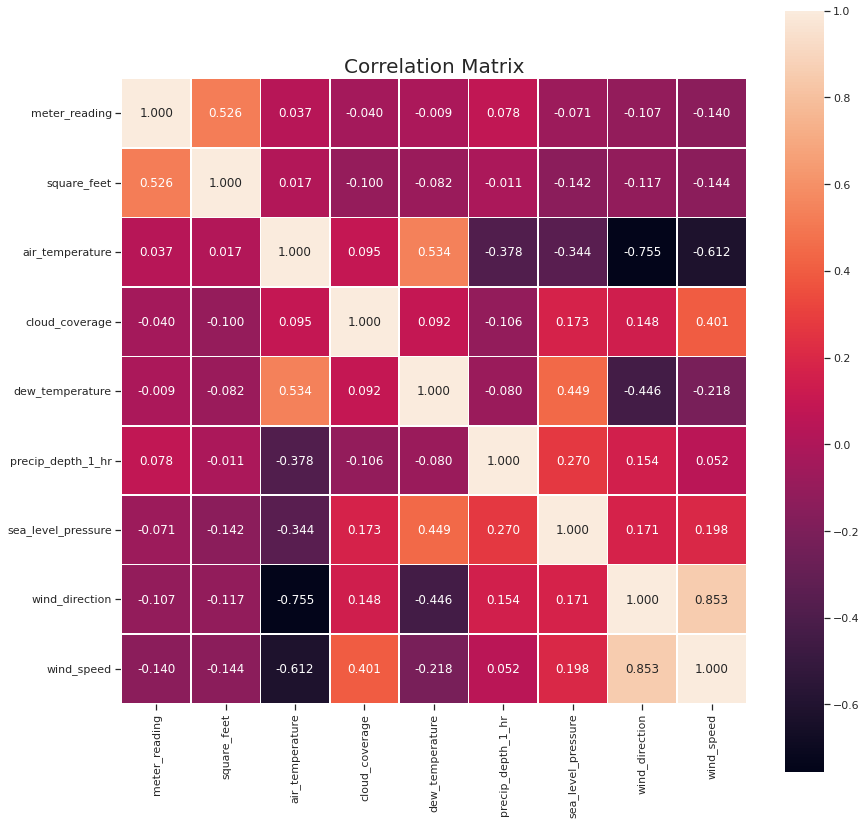

In [ ]:
corr_  = df_no_outlier.select_dtypes(include=np.number).corr()
fig,ax = plt.subplots(figsize = (14,14))
sns.heatmap(corr_, linewidths = 0.5,fmt = '.3f',annot = True, square= True, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 20)
plt.show()

Note:
Akan dianalisis multikolinieritas dengan heatmap.
- Variabel wind_direction memiliki korelasi negatif yang kuat terhadap variabel air_temperature sebesar 75,5%, dan
- Variabel wind_speed memiliki korelasi positif terhadap variabel wind_direction sebesar 85,3%

Dengan demikian, hal ini dapat menjadi catatan bagi analisis regresi pada bagian selanjutnya.


# Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [ ]:
# One-hot-encoding
df_new_dummies = pd.get_dummies(df_no_outlier)
print(df_new_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1412
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   meter_reading                              1255 non-null   float64
 1   square_feet                                1255 non-null   int64  
 2   air_temperature                            1255 non-null   float64
 3   cloud_coverage                             1255 non-null   float64
 4   dew_temperature                            1255 non-null   float64
 5   precip_depth_1_hr                          1255 non-null   float64
 6   sea_level_pressure                         1255 non-null   float64
 7   wind_direction                             1255 non-null   float64
 8   wind_speed                                 1255 non-null   float64
 9   primary_use_Education                      1255 non-null   uint8  
 10  primary_use_Entertainmen

## Model Penuh

In [ ]:
X = df_new_dummies.drop(columns = 'meter_reading')
Y = df_new_dummies['meter_reading']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state= 42)

In [ ]:
print("Training Data :")
print(f"X shape = {X_train.shape}")
print(f"y shape = {y_train.shape}")
print("Validation Data :")
print(f"X shape = {X_test.shape}")
print(f"y shape = {y_test.shape}")

Training Data :
X shape = (1004, 24)
y shape = (1004,)
Validation Data :
X shape = (251, 24)
y shape = (251,)


In [ ]:
columns = df_no_outlier.drop(columns = ['meter_reading','primary_use']).columns.values

ss = StandardScaler()
X_train[columns] = ss.fit_transform(X_train[columns])
X_test[columns] = ss.transform(X_test[columns])

X_train.head()

,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use_Education,primary_use_Entertainment/public assembly,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
1336,0.715517,-1.219520,-0.692918,-0.794167,2.118358,0.400295,0.449844,0.075457,0,0,...,0,0,0,0,0,0,0,0,0,0
246,1.634871,1.732098,-0.022852,-0.928892,-0.853381,-2.652245,-0.871354,-0.876893,0,0,...,1,0,0,0,0,0,0,0,0,0
986,0.512320,-0.731711,-1.201843,-1.856407,-0.670862,-0.492859,0.267698,-0.610440,1,0,...,0,0,0,0,0,0,0,0,0,0
1306,-0.526964,-1.219520,-0.692918,-0.794167,2.118358,0.400295,0.449844,0.075457,0,0,...,1,0,0,0,0,0,0,0,0,0
1057,1.992551,-1.212739,0.446835,-1.163684,-0.251441,-0.005499,0.475945,0.727551,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
mae_score = mean_absolute_error(y_test, y_pred)
mse_score = mean_squared_error(y_test,y_pred)
r2 = lr.score(X_train,y_train)

print('Model Evaluation :')
print('R-Squared Score for model :')
print(r2)
print('MSE score :')
print(mse_score)
print('MAE score :')
print(mae_score)

Model Evaluation :
R-Squared Score for model :
0.3754260070721034
MSE score :
5163.84973972622
MAE score :
50.491522717688675


In [ ]:
X_train_copy = X_train.copy()
Y_train_copy = y_train.copy()
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(Y_train_copy, X_train_copy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     25.61
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.06e-84
Time:                        09:31:48   Log-Likelihood:                -5748.8
No. Observations:                1004   AIC:                         1.155e+04
Df Residuals:                     980   BIC:                         1.166e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Model 2

In [ ]:
model2_columns = ['square_feet','cloud_coverage','dew_temperature','precip_depth_1_hr',
                 'wind_speed','primary_use','meter_reading']
df_new_2 = df_no_outlier.copy()[model2_columns]
print(df_new_2.info())
# One-hot-encoding.
df_2_dummies =  pd.get_dummies(df_new_2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1412
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   square_feet        1255 non-null   int64   
 1   cloud_coverage     1255 non-null   float64 
 2   dew_temperature    1255 non-null   float64 
 3   precip_depth_1_hr  1255 non-null   float64 
 4   wind_speed         1255 non-null   float64 
 5   primary_use        1255 non-null   category
 6   meter_reading      1255 non-null   float64 
dtypes: category(1), float64(5), int64(1)
memory usage: 102.8 KB
None


In [ ]:
display(df_2_dummies.head())

,square_feet,cloud_coverage,dew_temperature,precip_depth_1_hr,wind_speed,meter_reading,primary_use_Education,primary_use_Entertainment/public assembly,primary_use_Food sales and service,primary_use_Healthcare,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,7432,2.998727,17.379328,1.240589,3.391472,237.749127,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2720,2.998727,17.379328,1.240589,3.391472,118.553743,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5376,2.998727,17.379328,1.240589,3.391472,23.626500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23685,2.998727,17.379328,1.240589,3.391472,382.736016,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8000,2.998727,17.379328,1.240589,3.391472,28.963481,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_2 = df_2_dummies.drop(columns = ['meter_reading'])
Y_2 = df_2_dummies['meter_reading']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,Y_2, test_size = 0.2, random_state = 42)

In [ ]:
# Standardized data.

ss_2 = StandardScaler()

X_train_2[['square_feet','cloud_coverage','dew_temperature','precip_depth_1_hr','wind_speed']] = ss_2.fit_transform(X_train_2[['square_feet','cloud_coverage','dew_temperature',
                                                                                                            'precip_depth_1_hr','wind_speed']])

X_test_2[['square_feet','cloud_coverage','dew_temperature','precip_depth_1_hr','wind_speed']] = ss_2.fit_transform(X_test_2[['square_feet','cloud_coverage','dew_temperature',
                                                                                                            'precip_depth_1_hr','wind_speed']])
                                                                                                                              
                                                     

In [ ]:
print("Training Data :")
print(f"X shape = {X_train_2.shape}")
print(f"y shape = {y_train_2.shape}")
print("Validation Data :")
print(f"X shape = {X_test_2.shape}")
print(f"y shape = {y_test_2.shape}")
X_train_2.head()

Training Data :
X shape = (1004, 21)
y shape = (1004,)
Validation Data :
X shape = (251, 21)
y shape = (251,)


,square_feet,cloud_coverage,dew_temperature,precip_depth_1_hr,wind_speed,primary_use_Education,primary_use_Entertainment/public assembly,primary_use_Food sales and service,primary_use_Healthcare,primary_use_Lodging/residential,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
1336,0.715517,-0.692918,-0.794167,2.118358,0.075457,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
246,1.634871,-0.022852,-0.928892,-0.853381,-0.876893,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
986,0.512320,-1.201843,-1.856407,-0.670862,-0.610440,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,-0.526964,-0.692918,-0.794167,2.118358,0.075457,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1057,1.992551,0.446835,-1.163684,-0.251441,0.727551,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lr_2 = LinearRegression().fit(X_train_2,y_train_2)
y_pred_2 = lr_2.predict(X_test_2)
mae_score_2 = mean_absolute_error(y_test_2, y_pred_2)
mse_score_2 = mean_squared_error(y_test_2,y_pred_2)
r2_2 = lr_2.score(X_train_2,y_train_2)

print('Model Evaluation :')
print('R-Squared Score for model :')
print(r2_2)
print('MSE score :')
print(mse_score_2)
print('MAE score :')
print(mae_score_2)

Model Evaluation :
R-Squared Score for model :
0.372457358237295
MSE score :
5175.8190273192695
MAE score :
51.42947107844852


In [ ]:
X_train_copy = X_train_2.copy()
Y_train_copy = y_train_2.copy()
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(Y_train_copy, X_train_copy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     29.17
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           2.50e-85
Time:                        09:34:35   Log-Likelihood:                -5751.2
No. Observations:                1004   AIC:                         1.154e+04
Df Residuals:                     983   BIC:                         1.165e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Model diagnostik

1. Asumsi Linearitas.

Berdasarkan HeatMap dari tabel korelasi antara variabel-variabel penjelas dengan variabel dependen dan Pairwise plot didapakan tidak adanya hubungan yang linear dengan variabel dependenya. Oleh karena itu, asumsi pertama tidak terpenuhi. Namun, dapat dilakukan transformasi untuk melinearitaskan hubungannya agar asumsi dapat terpenuhi.

2. Asumsi tidak adanya Autokorelasi antara residual.

Berdasarkan hasil uji statistik Durbin-Watson diperoleh nilai 1.946. hal tersebut menandakan adanya Autokorelasi positif (1.946 < 2) antara residualnya.

3. Asumsi Homoskedastisitas.

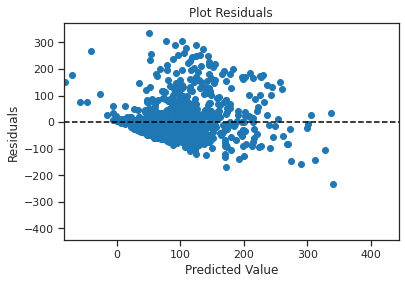

In [ ]:
y_pred_train = lr.predict(X_train)
residuals_ = y_train - y_pred_train
fig, ax = plt.subplots()
ax.scatter(x = y_pred_train, y = residuals_, color = 'tab:blue')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Residuals')
ax.set_title('Plot Residuals')
ax.set_xlim(y_pred.min()-1,y_pred.max()+1)
ax.hlines(0,y_pred.min()-1,y_pred.max()+1, linestyles= 'dashed', color = 'black')
plt.show()

Berdasarkan plot di atas, terlihat bahwa residuals tidak tersebar secara acak. Hal tersebut menandakan variansi yang tidak konstan. Oleh karena itu, asumsi homoskedastisitas tidak terpenuhi. Namun, dapat dilakukan transformasi atau menggunakan metode white untuk mengestimasi standar error apabila terdapat heteroskedastisitas.

4. Asumsi Multikolinearitas.

Berdasarkan HeatMap Plot, terdapat korelasi yang kuat antara variabel penjelasnya dan dilihat dari signifikansi slope ada beberapa yang tidak signifikan. Oleh karena itu, Asumsi Multikolinearitas tidak terpenuhi. Salah satu cara yang dilakuan adalah feature engineering, melakukan transformasi, atau menhilangkan salah satu variabel yang berkorelasi tinggi. Pada model 2 kami tidak memasukkan variabel yang tidak signifikan pada model 1, serta variabel yang terdeteksi multikolinearitas yang tinggi. Sehingga, dapat dilihat pada model 2 hampir semua variabelnya signifikan serta tidak terdeteksi multikolinearitas antar variabelnya.

5. Asumsi Normalitas.

Berdasarkan hasil dari uji Jarque-Bera didapatkan hasil p-val yang kecil yang dimana menandakan distribusi dari residual tidak normal. Oleh karena itu, Asumsi Normalitas tidak terpenuhi.Pada model 2 masih terlihat hasil dari uji durbin watson nilai dari statistik ujinya 1.949 dimana masih menandakan adanya autokorelasi. 


Berdasarkan model diagnostik yang telah dilakukan terlihat bahwa tidak disarankan untuk menggunakan metode regresi linear karena apabila suatu metode memiliki asumsi yang cukup banyak akan mengkompensasi kompleksitas data yang digunakan dimana data yang digunakan tidak begitu kompleks dan apabila suatu metode memiliki asumsi yang sedikit maka dapat digunakan ke data yang memiliki kompleksitas yang tinggi. Oleh karena itu, direkomendasikan untuk menggunakan metode lain dalam pembuatan model. 

# Kesimpulan & Recommendation

Actionable Actions for Ashrae Energy:
- Faktor yang signifikan dapat menjelaskan nilai meter reading (penggunaan energi) pada suatu bangunan adalah luas bangunan, cloud_coverage, suhu air, daya resap tanah terhadap air, kecepatan angin, dan kegunaan bangunan tersebut. 
- Pertama-tama dibuat model dengan seluruh variabel. Namun pada analisis sebelumnya telah diketahui bahwa terdapat beberapa indikasi multikolinieritas yang menjadi catatan. Pada model 1 terlihat bahwa arah mata angin dan suhu udara tidak signifikan menjelaskan nilai penggunaan energi pada suatu bangunan sehingga benar bahwa terdapat multikolinieritas pada variabel-variabel tersebut. Kemudian, pada model 2 dibangun model tanpa menggunakan variabel arah mata angin dan suhu udara. Dalam hal ini model 2 berguna secara statistik di mana nilai F-statisticnya kurang dari 0,05. Namun, jika dilihat dari nilai R-squared dan Adj. R-squared, performa model masih belum cukup baik sehingga sebagai rekomendasi untuk ke depannya dapat dilakukan pembangunan model lainnya. Beberapa yang dapat dilakukan adalah:
    - Dikarenakan model tidak berdistribusi normal, maka diperlukan transformasi pada model atau dapat dilakukan penambahan sampel pada data.
    - Dapat menambah informasi dari variabel lain yang berkaitan dengan konsumsi energi (sepeti curah hujan, dan sebagainya) sehingga dapat menjelaskan lebih baik variabel target yaitu tingkat konsumsi energi dan diharapkan dapat meningkatkan nilai R-squared dan Adj. R-squared.
    - Dapat dicoba untuk menggunakan regularised model seperti Lasso atau Ridge regression.

- Beberapa insight yang dapat diperoleh dari data adalah:
    - Berdasarkan model diperoleh informasi bahwa semakin luas suatu bangunan, maka hal ini cukup menjelaskan peningkatan konsumsi energi. Dengan demikian, ketika akan membangun suatu bangunan yang dapat menghemat konsumsi energi, maka dapat dibangun bangunan yang cukup untuk kebutuhan pengguna (tidak terlalu besar dan tidak terlalu kecil). Selain itu, untuk bangunan yang sudah ada dan cenderung luas dan memiliki konsumsi energi yang tinggi, maka dapat direkomendasikan untuk menggunakan alat-alat elektronik yang hemat energi (diasumsikan bangunan-bangunan yang sudah dibangun cukup lama masih menggunakan alat elektronik yang belum hemat energi). Apabila bangunan tersebut juga sudah menggunakan alat elektronik yang hemat energi, maka penggunaan listrik tersebut yang harus dikurangi. Sebagai contoh, dibanding menggunakan AC untuk pendingin ruangan, lebih baik menggunakan angin alami guna menghemat penggunaan energi.

    - Berdasarkan model juga diperoleh bahwa kegunaan bangunan cukup signifikan dalam menjelaskan peningkatan penggunaan energi, di mana bangunan publik cenderung memiliki penggunaan energi yang tinggi untuk memenuhi kebutuhan masyarakat umum.
- Rekomendasi untuk data:
    - Untuk data Ashrae Energy Prediction terdapat lebih dari 50% missing values pada kolom “year_bulit” dan “floor_count”. Beberapa hal yang mungkin menjadi penyebab missing values tersebut adalah tidak terjadi pencatatan kapan bangunan tersebut dibangun (bisa jadi bangunan tersebut ilegal sehingga tidak ada dokumen resmi/bukti fisik yang menyatakan tahun pembangunan dan jumlah lantai dalam suatu bangunan). Dengan demikian, kedua kolom tersebut akan didrop dari data. Selain itu, pada variabel “cloud_coverage” dan “sea_level_pressure” memiliki missing values yang kurang dari 10% dan untuk kolom “precip_depth_1_hr” memiliki missing values sekitar 12%. Dalam hal ini, akan dilakukan imputasi karena jumlah missing values tersebut masih relatif kecil. Kemudian jika dilihat berdasarkan distribusi dari ketiga kolom tersebut, dilihat bahwa ketiganya memiliki distribusi yang cenderung skewed sehingga imputasi akan menggunakan nilai median dari masing-masing kolom. Dan setelah dilakukan imputasi dapat dilihat bahwa distribusi dari ketiga kolom tersebut masing-masing cenderung mirip dengan hasil sebelum dilakukan imputasi sehingga dalam hal ini handling dengan imputasi (nilai median) dapat dilakukan.
